In [5]:
--Mértani átlag
select distinct 
    PERCENTILE_CONT(0.5) within group (order by value) over(),
    --a 0.5 százalék, azt jelenti hogy az adatsoba hol végzem el a beszúrást
    AVG(value) OVER()
from (
    values
    (1645.00),
    (1200.00),
    (1101.00),
    (1531.00),
    (1965.00),
    (271320.00),
    (1220.00),
    (1234.00),
    (1312.00),
    (1436.00)
) data(value)

(1 row affected)

Total execution time: 00:00:00.036

(No column name),(No column name)
1374,28396.400000


Mértani átlag

Ha azt akarjuk, hogy ne legyen benne a hibás érték az átlagban akkor kell ezt használni.

Például futásidő naplózás esetén igy lehet meghatározni azt az értéket ami fölött riasztani kell.

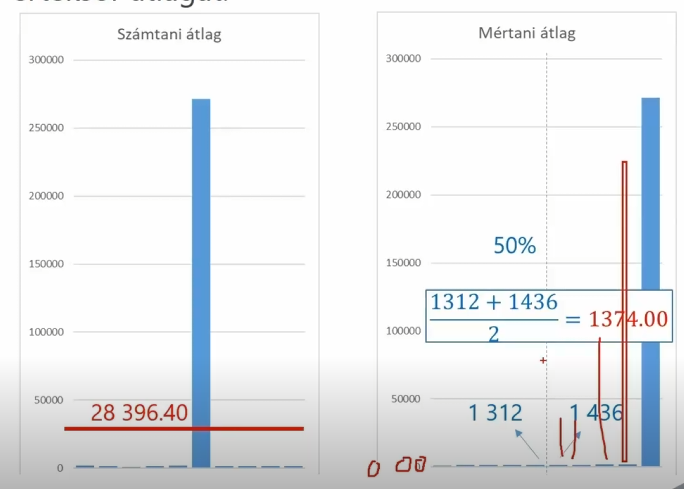

In [6]:
with data as (
    select *
    from (
        values
            (01, 1645.00),
            (02, 0.00),
            (03, 1101.00),
            (04, 1531.00),
            (05, 1965.00),
            (06, 271320.00),
            (07, 1220.00),
            (08, 1234.00),
            (09, 1312.00),
            (10, 1436.00),
            (11, 1721.00),
            (12, 1111.00),
            (13, 1005.00),
            (14, 1329.00),
            (15, 1789.00),
            (16, 1333.00),
            (17, 1687.00),
            (18, 1222.00),
            (19, 1707.00),
            (20, 0.00)
    ) data(id,value)
),
limits as (
    select distinct
        PERCENTILE_CONT(0.10) within group (order by value) over() lo_limit,
        PERCENTILE_CONT(0.90) within group (order by value) over() hi_limit
    from data
)
select data.* 
from data, limits
where data.[value] between limits.lo_limit and limits.hi_limit


(16 rows affected)

Total execution time: 00:00:00.146

id,value
1,1645.00
3,1101.00
4,1531.00
7,1220.00
8,1234.00
9,1312.00
10,1436.00
11,1721.00
12,1111.00
13,1005.00


Zajszűrés

A lenti adatsor 2 6 20 értékei hibásak. 10% nál és 90% nál kijelölök egy kezdőpontot és egy végpontot. És ebbe az ablakba lévő adatokkal dolgozom rendezés után

  

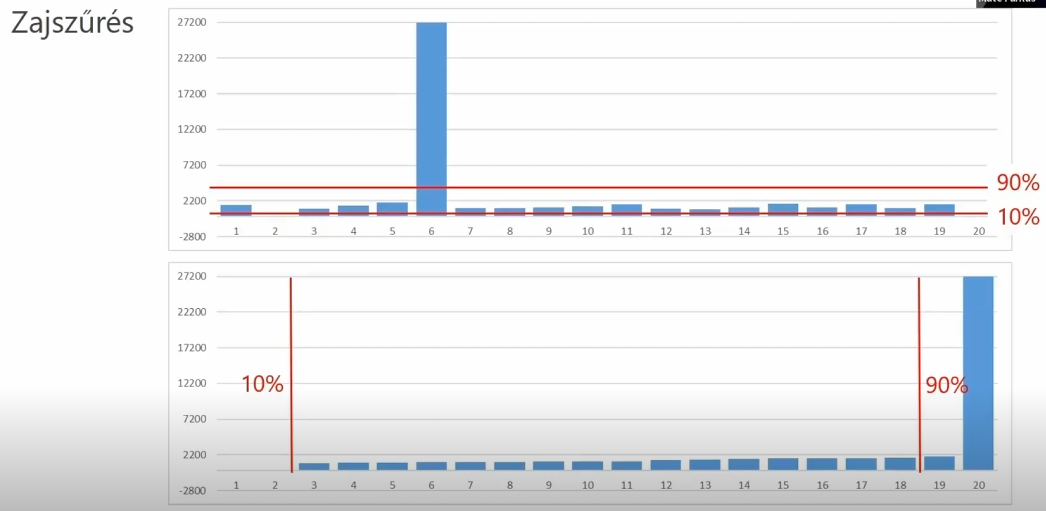